## DS Challenge

### Equipo SnowChallenge

## Ejercicio 2

Importamos libreria pandas para abrir y leer los datos

In [1]:
import pandas as pd

La estrategia sera iterar sobre el csv (chunks) y en cada iteracion agrupar resultados (groupby) consiguiendo un dataframe mucho mas pequeño y facil de manejar. Unicamente importaremos la columnas year, arr_port y pax, que son las que necesitamos para el estudio.

In [2]:
file = '/home/dsc/Data/challenge/bookings.csv.bz2'

In [3]:
chunk = 10000
df_iterator = pd.read_csv(file,
                          delimiter='^',
                          compression='bz2',
                          chunksize=chunk,
                          iterator = True,
                          usecols = ['year','arr_port','pax'],
                          nrows=100000,
                          na_values=0)

df = pd.DataFrame()

In [4]:
for item in df_iterator:
    item = item[item['year']==2013]
    item['arr_port'] = item['arr_port'].str.strip()
    item['arr_port'] = item['arr_port'].str.upper()
    item = item.groupby('arr_port')['pax'].sum()
    df = pd.concat([df,item])

In [5]:
df.reset_index(inplace=True)

In [6]:
top10 = df.groupby('index')[0].sum().sort_values(ascending=False).head(10)
top10

index
LHR    1006.0
MCO     861.0
JFK     795.0
LAX     761.0
BKK     747.0
LAS     732.0
SFO     705.0
ORD     686.0
CDG     676.0
DXB     587.0
Name: 0, dtype: float64

In [7]:
top10.astype(int)

index
LHR    1006
MCO     861
JFK     795
LAX     761
BKK     747
LAS     732
SFO     705
ORD     686
CDG     676
DXB     587
Name: 0, dtype: int64

## Ejercicio 3

In [286]:
file = '/home/dsc/Data/challenge/searches.csv.bz2'

In [287]:
iterator = pd.read_csv(file,
                    delimiter='^',
                    iterator=True,
                    usecols=['Date','Destination'],
                    #nrows=100000,
                    chunksize=10000)

In [288]:
df = pd.DataFrame()

In [289]:
for item in iterator:
    item = item[item['Destination'].isin(['MAD','BCN','AGP'])]
    item['Year'] = pd.to_datetime(item['Date']).dt.year
    item['Month'] = pd.to_datetime(item['Date']).dt.month
    item = item.drop('Date', axis=1)
    df = pd.concat([df, item])

In [290]:
df = df.groupby(['Destination','Month']).count().reset_index()

In [291]:
df.columns

Index(['Destination', 'Month', 'Year'], dtype='object')

In [292]:
df.columns = ['Destination', 'Month', 'Total']

In [293]:
df

,Destination,Month,Total
0,AGP,1,9633
1,AGP,2,8379
2,AGP,3,10659
3,AGP,4,8265
4,AGP,5,10830
5,AGP,6,7923
6,AGP,7,8892
7,AGP,8,7866
8,AGP,9,8151
9,AGP,10,6499


In [300]:
import seaborn as sns
from matplotlib import pyplot as plt

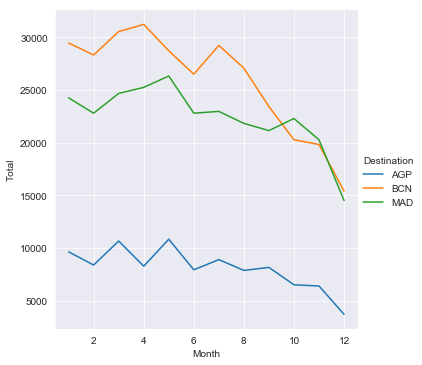

In [306]:
sns.set_style('darkgrid')
sns.relplot(data = df, x= 'Month', y='Total', hue='Destination', kind='line');

## Ejercicio 4

In [147]:
fbooking = '/home/dsc/Data/challenge/bookings.csv.bz2'
fsearches = '/home/dsc/Data/challenge/searches.csv.bz2'

fbooking_nodup = '/home/dsc/Data/challenge/bookings_nodup.csv'
fsearches_nodup = '/home/dsc/Data/challenge/searches_nodup.csv'

### Ejemplo ficheros

In [148]:
bi = pd.read_csv(fbooking, sep='^', chunksize=100000, low_memory=False, dtype=str)
all_chunks = pd.DataFrame()

for i, chunk in enumerate(bi):
    print(i, len(all_chunks))
    all_chunks = all_chunks.append(chunk)
    all_chunks.drop_duplicates(inplace=True)
all_chunks.colunms = all_chunks.colunms.str.strip()
all_chunks.to_csv(fbooking_nodup, sep='^', index=False)

0 0
1 100000
2 200000
3 300000
4 400000
5 500000
6 600000
7 700000
8 800000
9 900000
10 1000000
11 1000000
12 1000000
13 1000000
14 1000000
15 1000000
16 1000000
17 1000000
18 1000000
19 1000000
20 1000000
21 1000000
22 1000000
23 1000000
24 1000000
25 1000000
26 1000000
27 1000000


KeyboardInterrupt: 

In [136]:
pd.set_option('display.max_columns', None)

In [137]:
it_booking = pd.read_csv(fbooking,
                         delimiter='^',
                         usecols=['cre_date           ','dep_port','arr_port','pax'],
                         nrows=100000,
                         chunksize=100000)

it_searches = pd.read_csv(fsearches,
                         delimiter='^',
                         usecols=['Seg1Date','Origin','Destination'],
                         nrows=100000,
                         chunksize=100000)

In [138]:
ex_booking = pd.DataFrame()
ex_searches = pd.DataFrame()

In [139]:
for item in it_booking:
    print(enumerate(item))
    item.columns = ['Date','Origin','Destination','pax']
    item.dropna(inplace=True)
    item = item[item.pax > 0]
    item['Date'] = pd.to_datetime(item['Date'])
    item['Origin'] = item.Origin.str.strip()
    item['Destination'] = item.Destination.str.strip()
    item['Origin'] = item.Origin.str.upper()
    item['Destination'] = item.Destination.str.upper()
    ex_booking = pd.concat([ex_booking,item])
    

In [140]:
for item in it_searches:
    print(enumerate(item))
    item.columns = ['Origin','Destination','Date']
    item.dropna(inplace=True)
    item['Date'] = pd.to_datetime(item['Date'])
    item['Origin'] = item.Origin.str.strip()
    item['Destination'] = item.Destination.str.strip()
    item['Origin'] = item.Origin.str.upper()
    item['Destination'] = item.Destination.str.upper()
    ex_searches = pd.concat([ex_searches, item])

In [141]:
ex_booking.head(3)

,Date,Origin,Destination,pax
1,2013-03-26,SAL,CLT,1
2,2013-03-26,SAL,CLT,1
3,2013-03-26,AKL,SVO,1


In [142]:
ex_searches.head(3)

,Origin,Destination,Date
0,TXL,AUH,2013-01-26
1,ATH,MIL,2013-01-04
2,ICT,SFO,2013-08-02


In [143]:
ex_booking.drop_duplicates(inplace=True)

In [144]:
data = ex_searches.merge(ex_booking, how='left')

In [145]:
data[data.pax == 1]

,Origin,Destination,Date,pax
218,DUS,MUC,2013-01-08,1.0
226,LBA,LHR,2013-01-07,1.0
232,RUH,CCJ,2013-01-06,1.0
336,ORD,FRA,2013-01-16,1.0
442,ATH,SKG,2013-01-04,1.0
653,DUS,MUC,2013-01-29,1.0
685,FRA,MAD,2013-03-27,1.0
705,SJU,JFK,2013-01-31,1.0
777,LHR,DXB,2013-01-18,1.0
953,FRA,TXL,2013-01-11,1.0
